In [1]:
from langgraph.graph import StateGraph, START, END, MessagesState

In [2]:
class MyState(MessagesState, total=False): pass

In [3]:
from langchain.tools import tool

In [4]:
@tool
def add(a: int, b: int) -> int:
    """Adds two numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int: sum of two numbers
    """
    return a + b

In [5]:
@tool
def sub(a: int, b: int) -> int:
    """subtracts two numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int: difference of two numbers
    """
    return a - b

In [6]:
@tool
def mul(a: int, b: int) -> int:
    """product of two numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int: product of two numbers
    """
    return a * b

In [7]:
@tool
def div(a: int, b: int) -> int|float:
    """division of two numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int: division  two numbers
    """
    return a // b

In [8]:
@tool
def apply_discount(total: int, discount: float) -> int|float:
    """
    Applies a discount percentage to a total amount.

    Args:
        total: The original total amount (integer).
        discount: The discount percentage (float, e.g., 0.10 for 10%).

    Returns:
        The new total amount after applying the discount (float).
        It returns float because the calculation of discount often results in a non-integer value.
    """
    # Calculate the discount amount: total * discount
    discount_amount = total * discount

    # Calculate the final price: total - discount_amount
    final_price = total - discount_amount

    # Alternatively, calculate the final price directly: total * (1 - discount)
    # final_price = total * (1 - discount)

    return final_price

In [9]:
import math
@tool
def calculate_emi(principal: int | float, annual_rate: float, years: int) -> float:
    """
    Calculates the Equated Monthly Installment (EMI) for a loan.

    EMI is calculated using the formula:
    EMI = P * R * [ (1 + R)^n / ((1 + R)^n - 1) ]

    Where:
    P = Principal loan amount
    R = Monthly interest rate (annual_rate / 12 / 100)
    n = Total number of monthly installments (years * 12)

    Args:
        principal: The total loan amount (P).
        annual_rate: The annual interest rate (e.g., 8.5 for 8.5%).
        years: The loan tenure in years.

    Returns:
        The EMI amount per month (float).
    """
    if annual_rate == 0:
        # Avoid division by zero if rate is 0%. EMI is simply Principal / total months.
        return principal / (years * 12)

    # 1. Calculate the Monthly Interest Rate (R)
    # The rate must be converted from a percentage (e.g., 8.5) to a decimal (0.085)
    # and then divided by 12 for the monthly rate.
    monthly_rate = (annual_rate / 100) / 12

    # 2. Calculate the Total Number of Payments (n)
    num_payments = years * 12

    # 3. Apply the EMI formula
    # EMI = P * R * [ (1 + R)^n / ((1 + R)^n - 1) ]

    # Numerator part of the fraction: R * (1 + R)^n
    numerator = monthly_rate * (math.pow(1 + monthly_rate, num_payments))

    # Denominator part of the fraction: (1 + R)^n - 1
    denominator = math.pow(1 + monthly_rate, num_payments) - 1

    # The final EMI calculation
    emi = principal * (numerator / denominator)

    return emi

In [10]:
@tool
def calculate_percentage(part: int | float, whole: int | float) -> float:
    """
    Calculates what percentage the 'part' is of the 'whole'.

    The formula used is: (part / whole) * 100

    Args:
        part: The smaller number or portion of the whole.
        whole: The total amount or the base number (cannot be zero).

    Returns:
        The percentage (float).

    Raises:
        ValueError: If 'whole' is zero.
    """
    if whole == 0:
        raise ValueError("The 'whole' value cannot be zero when calculating a percentage.")

    # Calculate the ratio, then multiply by 100 to get the percentage
    percentage = (part / whole) * 100
    return percentage

In [11]:
from utils import get_llm

llm = get_llm()

In [12]:
tools = [add, sub, mul, div, apply_discount, calculate_emi, calculate_percentage ]

In [13]:
response = llm.invoke("What is 4 + 5")
response

AIMessage(content='4 + 5 = 9', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 7, 'total_token_count': 14, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 7}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.04986016239438738, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--c53e04c0-a716-48ab-bbd6-2cbce05c106c-0', usage_metadata={'input_tokens': 7, 'output_tokens': 7, 'total_tokens': 14, 'input_token_details': {'cache_read': 0}})

In [14]:
response = llm.invoke("What is capital of india")
response

AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 5, 'candidates_token_count': 9, 'total_token_count': 14, 'prompt_tokens_details': [{'modality': 1, 'token_count': 5}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0004185653395122952, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--adccd714-f759-4c6c-a857-eab4a723da56-0', usage_metadata={'input_tokens': 5, 'output_tokens': 9, 'total_tokens': 14, 'input_token_details': {'cache_read': 0}})

In [15]:
# making llm aware of tools
llm_with_tools = llm.bind_tools(tools)

In [16]:
# checking how this works
response = llm_with_tools.invoke("What is 4 + 5")

In [17]:
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 4.0, "b": 5.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 530, 'candidates_token_count': 5, 'total_token_count': 535, 'prompt_tokens_details': [{'modality': 1, 'token_count': 530}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 5}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0012077974155545236, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--55a92bca-75d1-4e4a-817d-cf01809e48c4-0', tool_calls=[{'name': 'add', 'args': {'a': 4.0, 'b': 5.0}, 'id': '1062443a-5a91-4759-b0d5-783a1b0bd7c2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 530, 'output_tokens': 5, 'total_tokens': 535, 'input_token_details': {'cache_read': 0}})

In [18]:
# checking how this works
response = llm_with_tools.invoke("Apply discount of 10% on total bill of 7765")
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'apply_discount', 'arguments': '{"discount": 0.1, "total": 7765.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 539, 'candidates_token_count': 7, 'total_token_count': 546, 'prompt_tokens_details': [{'modality': 1, 'token_count': 539}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 7}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.03190969143595014, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--5a5224a9-fecc-41a3-9afd-442c4ff35a7b-0', tool_calls=[{'name': 'apply_discount', 'args': {'discount': 0.1, 'total': 7765.0}, 'id': '68cfaf8a-5528-4c35-8adb-08bc4bf17999', 'type': 'tool_call'}], usage_metadata={'input_tokens': 539, 'output_tokens': 7, 'total_tokens': 546, 'input_token_details': {'cache_read': 0}})

In [19]:
# checking how this works
response = llm_with_tools.invoke("Calculate monthly emi of 100000 at 7% yearly interest for 3 years")
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'calculate_emi', 'arguments': '{"principal": 100000.0, "annual_rate": 7.0, "years": 3.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 544, 'candidates_token_count': 11, 'total_token_count': 555, 'prompt_tokens_details': [{'modality': 1, 'token_count': 544}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 11}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.049156552011316475, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--64685bf8-b695-40c2-a56a-ca29fb58d685-0', tool_calls=[{'name': 'calculate_emi', 'args': {'principal': 100000.0, 'annual_rate': 7.0, 'years': 3.0}, 'id': 'a1da3bb2-8bf8-4288-80a1-e3ff3875b230', 'type': 'tool_call'}], usage_metadata={'input_tokens': 544, 'output_tokens': 11, 'total_tokens': 555, 'input_to

In [20]:
response = llm_with_tools.invoke("What is capital of india")
response

AIMessage(content='I am sorry, I cannot fulfill this request. My capabilities are limited to performing mathematical calculations. I do not have access to real-world information such as the capital of India.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 528, 'candidates_token_count': 36, 'total_token_count': 564, 'prompt_tokens_details': [{'modality': 1, 'token_count': 528}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 36}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.19790709018707275, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--36a9b51e-9bfc-4da2-a26d-fe82fdd249a8-0', usage_metadata={'input_tokens': 528, 'output_tokens': 36, 'total_tokens': 564, 'input_token_details': {'cache_read': 0}})

In [21]:
# Langgraph
from langgraph.prebuilt import ToolNode, tools_condition

# node
def ask_llm(state: MyState):
    """This will asks llm
    """
    return { "messages": [llm_with_tools.invoke(state['messages'])] }

tool_node = ToolNode(tools)

In [22]:
tool_graph = StateGraph(MyState)
tool_graph.add_node("ask", ask_llm)
tool_graph.add_node("tools", tool_node)

In [23]:
tool_graph.set_entry_point("ask")
tool_graph.add_conditional_edges("ask", tools_condition, {
    "tools": "tools",
    "__end__": END
})
tool_graph.add_edge("tools", "ask")
graph = tool_graph.compile()

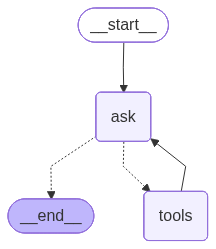

In [24]:
graph

In [25]:
from langchain_core.messages import HumanMessage, SystemMessage

In [26]:
response = graph.invoke(
    {
        "messages": [
            HumanMessage("What is capital of india?")
            ]
    }
)

In [27]:
response


{'messages': [HumanMessage(content='What is capital of india?', additional_kwargs={}, response_metadata={}, id='e0d1d955-cc6f-4ebe-bd2d-ab90ec286822'),
  AIMessage(content='I am sorry, I cannot fulfill this request. My capabilities are limited to performing mathematical calculations and I cannot provide information such as the capital of India.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 529, 'candidates_token_count': 30, 'total_token_count': 559, 'prompt_tokens_details': [{'modality': 1, 'token_count': 529}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 30}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.1636658509572347, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--763bade8-2e38-4adb-987b-27eca08d55a6-0', usage_metadata={'input_tokens': 529, 'output_tokens':

In [28]:
response = graph.invoke(
    {
        "messages": [
            HumanMessage("What is 4 + 5")
            ]
    }
)

In [29]:
response

{'messages': [HumanMessage(content='What is 4 + 5', additional_kwargs={}, response_metadata={}, id='2436075e-5e48-4a77-9075-d3c3b93a6f35'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 4.0, "b": 5.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 530, 'candidates_token_count': 5, 'total_token_count': 535, 'prompt_tokens_details': [{'modality': 1, 'token_count': 530}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 5}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0012077974155545236, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--9cf71410-f853-4b13-8980-7ec671967b3e-0', tool_calls=[{'name': 'add', 'args': {'a': 4.0, 'b': 5.0}, 'id': '3c822428-c695-4752-8b7d-6a4a9e179430', 'type': 'tool_call'}], usage_metadata={'input_tokens': 530, 'out

In [30]:
response = graph.invoke(
    {
        "messages": [
            HumanMessage("My grocery bill is 17000"),
            HumanMessage("Apply 15% discount and add 5% tax"),
        ]
    }
)
response

{'messages': [HumanMessage(content='My grocery bill is 17000', additional_kwargs={}, response_metadata={}, id='70467b1a-f666-4818-83dd-3194f4dcf211'),
  HumanMessage(content='Apply 15% discount and add 5% tax', additional_kwargs={}, response_metadata={}, id='d7e4ffee-50c6-4b20-991c-610cd4b1083f'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'apply_discount', 'arguments': '{"discount": -0.05, "total": 14450.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 545, 'candidates_token_count': 14, 'total_token_count': 559, 'prompt_tokens_details': [{'modality': 1, 'token_count': 545}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 14}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.1948948928288051, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--64a02246-f74e-4797-88af

In [31]:
response = graph.invoke(
    {
        "messages": [
            HumanMessage("I want to buy a iphone which is worth 130000"),
            HumanMessage("My Amex card gives me 3% cashback and instant discount of 1%"),
            HumanMessage("What would be the price of iphone for me now"),
        ]
    }
)
response

{'messages': [HumanMessage(content='I want to buy a iphone which is worth 130000', additional_kwargs={}, response_metadata={}, id='9e8beb2a-a9fa-49db-9436-ee5af2d8a74e'),
  HumanMessage(content='My Amex card gives me 3% cashback and instant discount of 1%', additional_kwargs={}, response_metadata={}, id='a4297f94-9b74-4535-8500-f1703cc8bc15'),
  HumanMessage(content='What would be the price of iphone for me now', additional_kwargs={}, response_metadata={}, id='01db9e5e-5709-4743-ac7d-4852509a6cec'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'apply_discount', 'arguments': '{"discount": 0.01, "total": 130000.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 566, 'candidates_token_count': 7, 'total_token_count': 573, 'prompt_tokens_details': [{'modality': 1, 'token_count': 566}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 7}], 'thoughts_token_count': 0, 'cached_content_token_count': 0,

In [33]:
llm

ChatVertexAI(client=<google.cloud.aiplatform_v1beta1.services.prediction_service.client.PredictionServiceClient object at 0x0000023209234C20>, project='massive-seer-457104-j1', model_name='gemini-2.5-flash-lite', full_model_name='projects/massive-seer-457104-j1/locations/us-central1/publishers/google/models/gemini-2.5-flash-lite', client_options=ClientOptions: {'api_endpoint': 'us-central1-aiplatform.googleapis.com', 'client_cert_source': None, 'client_encrypted_cert_source': None, 'quota_project_id': None, 'credentials_file': None, 'scopes': None, 'api_key': None, 'api_audience': None, 'universe_domain': None}, default_metadata=(), model_kwargs={})

In [43]:
from dotenv import load_dotenv
_ = load_dotenv()

In [44]:
from langchain_tavily import TavilySearch
tavily_search_tool = TavilySearch(
    max_results = 3,
    topic="general"

)

In [45]:
tools = [ tavily_search_tool ]

In [46]:
llm_with_tools = llm.bind_tools(tools=tools)

In [47]:
prompt = f"""You are helpful assistant, with access to tools for websearch
Invoke tools based on questions asked if necessary
"""

In [53]:
class MyState(MessagesState):
    question: str

In [56]:
def respond(state: MyState):
    response = llm_with_tools.invoke(
        [
            SystemMessage(prompt),
            HumanMessage(state['question'])
        ]
    )
    return {
        "messages": response
    }

In [57]:
tool_node = ToolNode(tools)

In [62]:
web_search_graph = StateGraph(MyState)
web_search_graph.add_node("query", respond)
web_search_graph.add_node("tools", tool_node)
web_search_graph.set_entry_point("query")
web_search_graph.add_conditional_edges("query", tools_condition, {
    "tools": "tools",
    "__end__": END
})
#web_search_graph.add_edge("tools", "query")
graph = web_search_graph.compile()

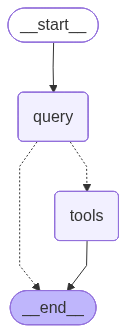

In [63]:
graph

In [64]:
response = graph.invoke(
    {
        "messages": [],
        "question": "search for price of crude oil today?"
    }
)

In [65]:
response

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search', 'arguments': '{"time_range": "day", "query": "price of crude oil"}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 1400, 'candidates_token_count': 13, 'total_token_count': 1413, 'prompt_tokens_details': [{'modality': 1, 'token_count': 1400}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 13}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.06390143357790433, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--2372e42e-6516-4b86-a614-4c81697946d8-0', tool_calls=[{'name': 'tavily_search', 'args': {'time_range': 'day', 'query': 'price of crude oil'}, 'id': '39baa05f-6d5e-44f4-abdf-4d5fe1a61c63', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1400, 'output_tokens': 13, 'total_tokens': 1413, '

In [73]:
for message in response['messages']:
    #message.pretty_print()
    if message.content != "":
        
        print((message.content))

{"query": "price of crude oil", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://in.investing.com/commodities/crude-oil", "title": "Crude Oil Price | WTI Price Chart - Investing.com India", "content": "The current price of Crude Oil WTI futures is 59.75, with a previous close of 59.43. What Is the Daily Trading Range for Crude Oil WTI Futures?", "score": 0.82254606, "raw_content": null}, {"url": "https://www.marketwatch.com/investing/future/cl.1?gaa_at=eafs&gaa_n=AWEtsqetBw77E5Z_CZnrHi_RCcenr6Ioql1LQnPZ8tksDefx-MsGOGVUoXOn&gaa_ts=69100654&gaa_sig=pACxaX1eCdSMoh9tcfJUYgGPEdQLO8I8iiGbeWAenopw5krBqI4xFX1mxBgs1oqUlnRbE-fgZQuGA0Ox8WafpQ%3D%3D", "title": "CL.1 | Crude Oil WTI (NYM $/bbl) Front Month Overview - MarketWatch", "content": "Crude Oil WTI (NYM $/bbl) Front Month ; Open $59.65 ; Day Range 59.32 - 60.46 ; 52 Week Range 55.12 - 80.77 ; Open Interest 279,462 ; 5 Day. -1.72%.", "score": 0.67269784, "raw_content": null}, {"url": "https://www.cnbc.c

In [74]:
response = graph.invoke(
    {
        "messages": [],
        "question": "search for news about marvel movies"
    }
)

In [75]:
response

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search', 'arguments': '{"query": "marvel movies", "topic": "news"}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 1398, 'candidates_token_count': 9, 'total_token_count': 1407, 'prompt_tokens_details': [{'modality': 1, 'token_count': 1398}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.012302792734569974, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--3929b2e2-1dd4-4b9a-8a68-f04ed40c18b5-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'marvel movies', 'topic': 'news'}, 'id': '02ea723f-aa2c-488b-9a1c-de78847f385a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1398, 'output_tokens': 9, 'total_tokens': 1407, 'input_token_details'